<a href="https://colab.research.google.com/github/mohitsaini1166/Loan-Approval-Prediction-Machine-Learning-Project/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***💲LOAN PREDICTION***

In [1]:
from google.colab import files
upload = files.upload()

Saving loan.csv to loan.csv


In [4]:
# import all necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [5]:
# load tha dataset
df = pd.read_csv('/content/loan.csv')

#***⚡EDA (Exploratory Data Analysis)***

In [6]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [8]:
# check unique values from our categorical column("loan_status")
print(df['loan_status'].value_counts())

loan_status
Approved    45
Denied      16
Name: count, dtype: int64


In [9]:
# check for null values
df.isnull().sum()

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0


In [10]:
#check for duplicate vakues
df.duplicated().sum()

0

#***⚡VISUALIZATION STEPS***

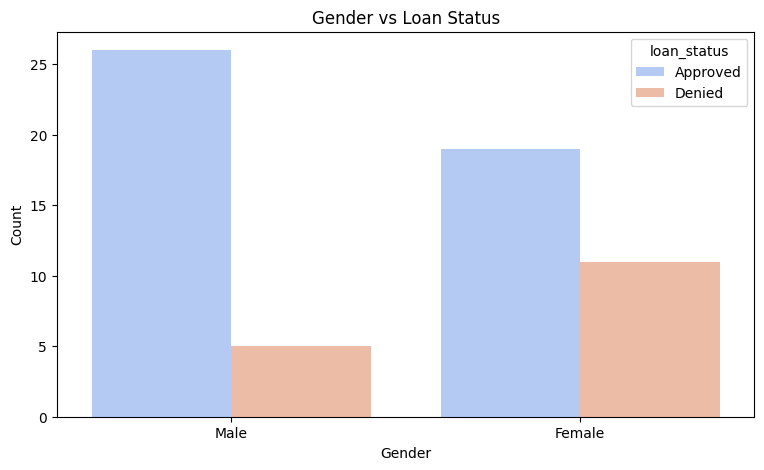

Description : This bar graph show relationship b/w gender and loan status(Approved or Denied)


In [11]:
# plot bar graphs(count plots) for understand about insights
plt.figure(figsize=(9, 5))
sns.countplot(x="gender", data=df, hue="loan_status", palette="coolwarm")
plt.title("Gender vs Loan Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
print("Description : This bar graph show relationship b/w gender and loan status(Approved or Denied)")

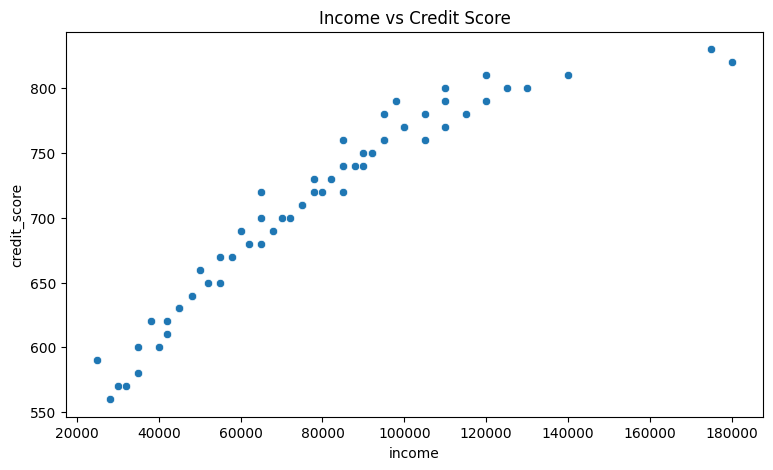

Description : This scatter plot show relationship b/w income and credit score


In [12]:
# ScatterPlot Graphs -->
plt.figure(figsize=(9, 5))
sns.scatterplot(x="income", y="credit_score", data=df)
plt.title("Income vs Credit Score")
plt.xlabel("income")
plt.ylabel("credit_score")
plt.show()
print("Description : This scatter plot show relationship b/w income and credit score")

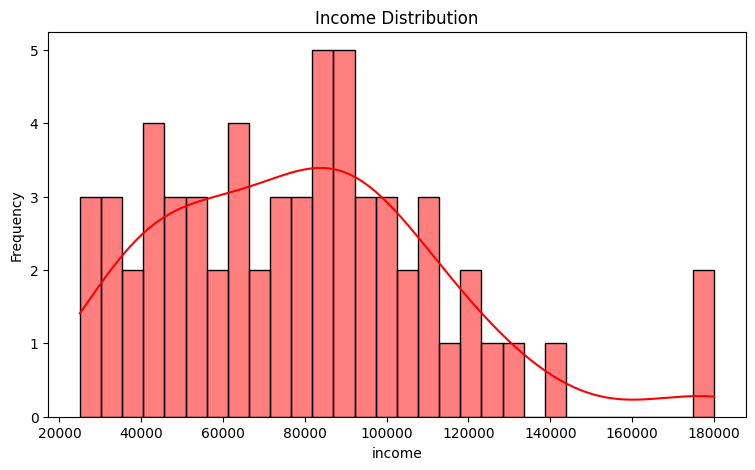

Description : This histogram show distribution of income


In [13]:
# Histogram Graphs -->
plt.figure(figsize=(9, 5))
sns.histplot(df["income"], bins=30, kde=True, color="red")
plt.title("Income Distribution")
plt.xlabel("income")
plt.ylabel("Frequency")
plt.show()
print("Description : This histogram show distribution of income")

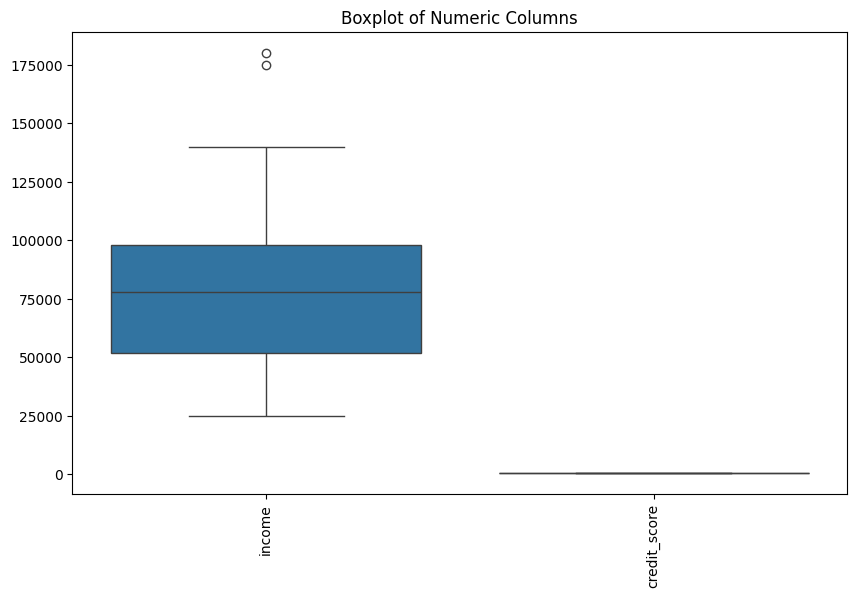

In [15]:
# Box Plots -->

# Simple Boxplot to identify outliers
numeric_columns = ['income', 'credit_score']

plt.figure(figsize=(10, 6))
sns.boxplot(df[numeric_columns])
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=90)
plt.show()



In [16]:
# Removing outliers using IQR method
numeric_columns = ['income', 'credit_score']
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#***⚡ Feature Engineering***

In [17]:
# Using LabelEncoder



label_encoders = {}  # Dictionary to store fitted encoders

for col in ["gender", "occupation", "education_level", "marital_status", "loan_status"]:
    le = LabelEncoder()  # Initialize LabelEncoder
    df[col] = le.fit_transform(df[col])  # Transform column
    label_encoders[col] = le  # Store the encoder for later use

df


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,0
1,45,0,35,4,1,62000,680,0
2,28,1,33,3,1,25000,590,1
3,51,0,16,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0
...,...,...,...,...,...,...,...,...
56,39,1,2,4,0,100000,770,0
57,25,0,27,3,1,32000,570,1
58,43,1,4,1,0,95000,760,0
59,30,0,37,4,1,55000,650,0


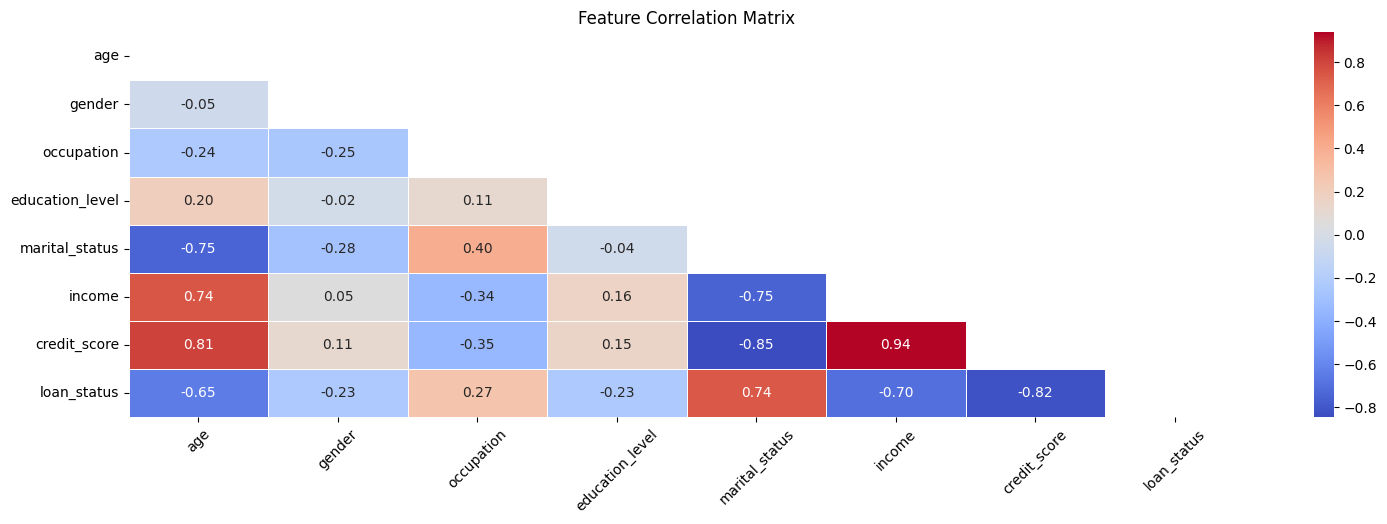

In [18]:
# Correlation Heatmap (Only numerical features)

corr_matrix = df.corr()

# Lower triangle mask create karo
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 5))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)  # X-axis labels readable banane ke liye
plt.yticks(rotation=0)
plt.show()


In [19]:
# Drop all unnecessary columns based on correlation (not useful for analysis)
df.drop(columns=["gender","occupation","education_level"], inplace=True)

# Because of the correlation of these columns are very low with stroke that we can able to see in the graph that is given above in "Feature Correlation Matrix".

In [20]:
df.head()

,age,marital_status,income,credit_score,loan_status
0,32,0,85000,720,0
1,45,1,62000,680,0
2,28,1,25000,590,1
3,51,0,105000,780,0
4,36,0,75000,710,0


In [21]:
# Split the data
x=df.drop(columns=["loan_status"])
y=df["loan_status"]

# fill split in train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Standardize numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [23]:
print(y.value_counts())  # Shows counts of unique values in y


loan_status
0    45
1    16
Name: count, dtype: int64


In [24]:
# Handle Imbalanced Data (if needed)
if y_train.value_counts().min() / y_train.value_counts().max() < 0.5:  # Check imbalance
    smote = SMOTE(random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)

In [25]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

In [26]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }


In [27]:
# Print results
for model, metrics in results.items():
    print(f"{model} Performance:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Logistic Regression Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Decision Tree Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Random Forest Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

